**NB:** This study involves use of time-varying data. Keep in mind that the analysis depends on the data at the moment of the study, meaning the results can change at the moment you run this notebook 

### Load and Extraction

In [64]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
# import quandl
# from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

One of the portfolio management principles for long-term investors is to diversify the nature of the stock in terms of the company's sector, location, etc. In my case, I mainly diversify in terms of popular sectors which are : Finance, Consumer discretionary, Consumer staples, Healthcare, Industrial, Energy and Technology. A location-type diversification was made by choosing stocks from France and USA. From here, the stocks were chosen randomly

In [65]:
# Load stocks data using Yahoo API

# Finance
bnp = yf.download('BNP.PA') # BNP Paribas

# Consumer discretionary
ips = yf.download('IPS.PA') # Ipsos

# Consumer staples
mmt = yf.download('MMT.PA') # Metropole TV
                  
# Healthcare
san = yf.download('SAN.PA') # Sanofi

# Industrial
dbg = yf.download('DBG.PA') # Derichbourg

# Energy
tte = yf.download('TTE.PA') # Total Energies Nouvelles

# Technology
acn = yf.download('ACN') # Accenture = stock américain
stm = yf.download('STM.PA') # STMicroelectrnoics

# Initiate the set of stocks 
set_stocks_df = ()

# Initiate the stock's names based on their mnemonic
stock_list_names = ['BNP', 'IPS','SAN','MMT','DBG','TTE','ACN','STM']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [66]:
# Check if the data were well-downloaded
stm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-09-03,33.299999,33.509998,32.369999,33.509998,17.477066,3631641
2001-09-04,34.990002,35.099998,32.599998,34.180000,17.826504,7210915
2001-09-05,33.209999,33.299999,32.160000,32.400002,16.898146,6116195
2001-09-06,32.599998,32.939999,28.209999,28.299999,14.759799,15032414
2001-09-07,29.000000,29.600000,27.379999,29.150000,15.203110,13363294
...,...,...,...,...,...,...
2022-12-23,33.889999,34.029999,33.314999,33.605000,33.605000,1164932
2022-12-27,33.810001,34.020000,33.035000,33.244999,33.244999,832140
2022-12-28,33.299999,33.365002,32.764999,32.810001,32.810001,1287208


### EDA part 1

The downloaded dataset contains stock information from the company's IPO (Initial Public Offering) date to the actual date. Since the chosen companies do not have the same IPO date, we must define a common interval of study.  A good practice is to choose the start of the interval to be the recent IPO date from our companies' list. Another approach is to have a predefined interval based on general time format (study stocks on a week, a month, a year or 2 , etc)

**NB:** To know more about IPO, check this link : https://en.wikipedia.org/wiki/Initial_public_offering

In [67]:
# Define the start date and end date prior to the data
list_stock = (bnp, ips, san, mmt, dbg, tte,  acn, stm) # the order should be the same as the list stock_list_names
length=[]
for stock_df in list_stock :
    length.append(len(stock_df.index))

# Check the number of values for each stock data
length

[7518, 5654, 5884, 5883, 5902, 5915, 5398, 5479]

In [68]:
# Check for the longest duration
ind_l =  np.array(length).argmax()
stock_list_names[ind_l]

'BNP'

In [69]:
# So the company BNP is the oldest stock based on its IPO;
# Duration for correlation
duration_corr = 660 #30 months of recording data

l = len(bnp.index) 

start_corr = bnp.index[l - duration_corr]
end_corr = bnp.index[-1]
[start_corr,end_corr]

[Timestamp('2020-06-11 00:00:00'), Timestamp('2022-12-30 00:00:00')]

With the new interval, we can extract the important data and check if there is a correlation among their daily normalized returns

In [70]:
counter = 0

# Initialize my table used for correlation
indices_corr = bnp[start_corr:end_corr].index #Extract indices
df_corr = pd.DataFrame(0,index = indices_corr,columns = stock_list_names)

# Assign values of normalized return inside that table
for stock_df in list_stock :
    stock_df_corr = stock_df[start_corr:end_corr]
    Norm_return_corr = stock_df_corr['Adj Close']/stock_df_corr.iloc[0]['Adj Close']
    df_corr[stock_list_names[counter]]=Norm_return_corr
    counter+=1
    
df_corr

,BNP,IPS,SAN,MMT,DBG,TTE,ACN,STM
Date,,,,,,,,
2020-06-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-06-12,1.006331,0.997748,0.997758,1.009709,0.986476,1.010655,1.028783,0.995652
2020-06-15,0.986906,0.990991,0.999664,0.988350,0.984222,0.998992,1.019597,0.991739
2020-06-16,1.036259,1.004504,1.020735,0.990291,1.004508,1.031821,1.043123,1.034348
2020-06-17,1.034676,1.027027,1.050325,0.992233,0.993238,1.035133,1.047206,1.043478
...,...,...,...,...,...,...,...,...
2022-12-23,1.743024,2.777897,1.095405,1.685362,2.061090,2.054221,1.404070,1.487450
2022-12-27,1.749504,2.787576,1.088542,1.684245,2.064957,2.068792,1.399954,1.471515
2022-12-28,1.735249,2.816614,1.082883,1.696523,2.082358,2.059772,1.388398,1.452261


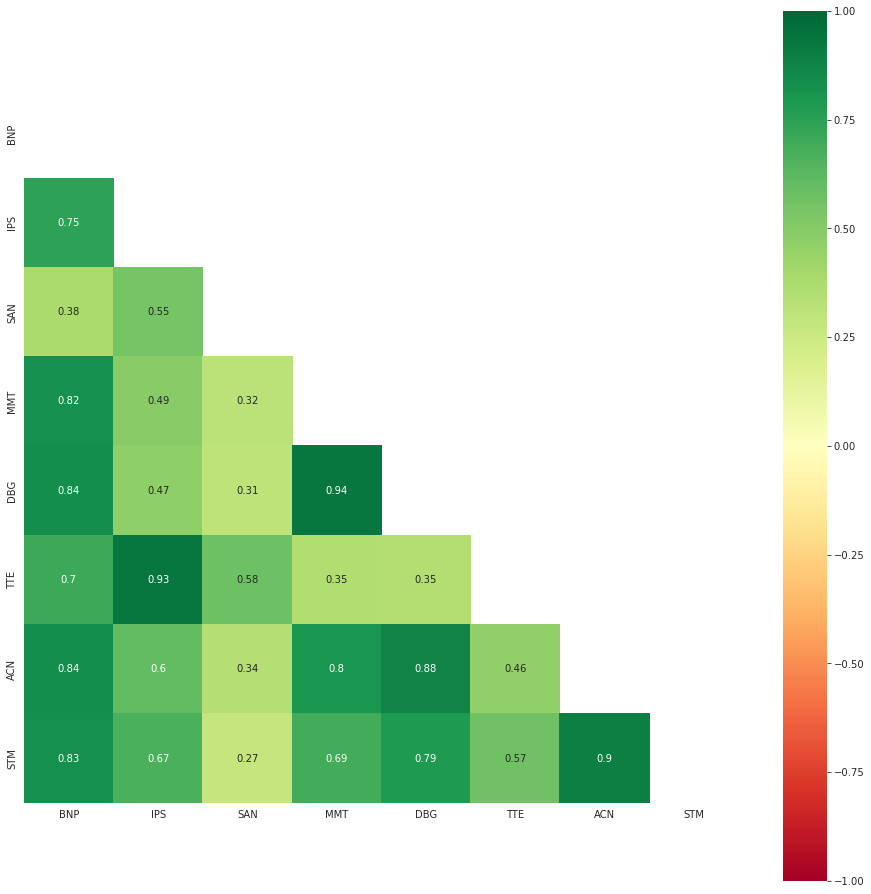

In [71]:
# Evaluate the matrix correlation
corr = df_corr.corr()

mask =  np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True #triu_indices is used to return the indices for the upper-triangle of an (n,m) array
with sns.axes_style("white"):
    f,ax  = plt.subplots(figsize=(16,16))
    ax = sns.heatmap(corr, vmin = -1, mask = mask, vmax = 1, cmap='RdYlGn', square = True, annot = True)

# color code :
# - The darker the color, higher is the correlation 
# - red and its nuances: denotes a negative correlation
# - yellow and its nuance: denotes a correlation almost null (in general the correlation is really weak in this case)
# - green and its nuances : a positive correlation

Only positive correlation has been spotted. Plus, almost all the stocks are strongly correlated in the studied period (09/06/2020 - 28/02/2022) except for SAN stock. This period encapsulates COVID perio and post-COVID period during which there was a resumption of economic activities. Beware that this result can be different at further updates depending on the macro and micro economic effects.

To get a better insight of this correlation, we can draw a scatter plot.

<Figure size 576x576 with 0 Axes>

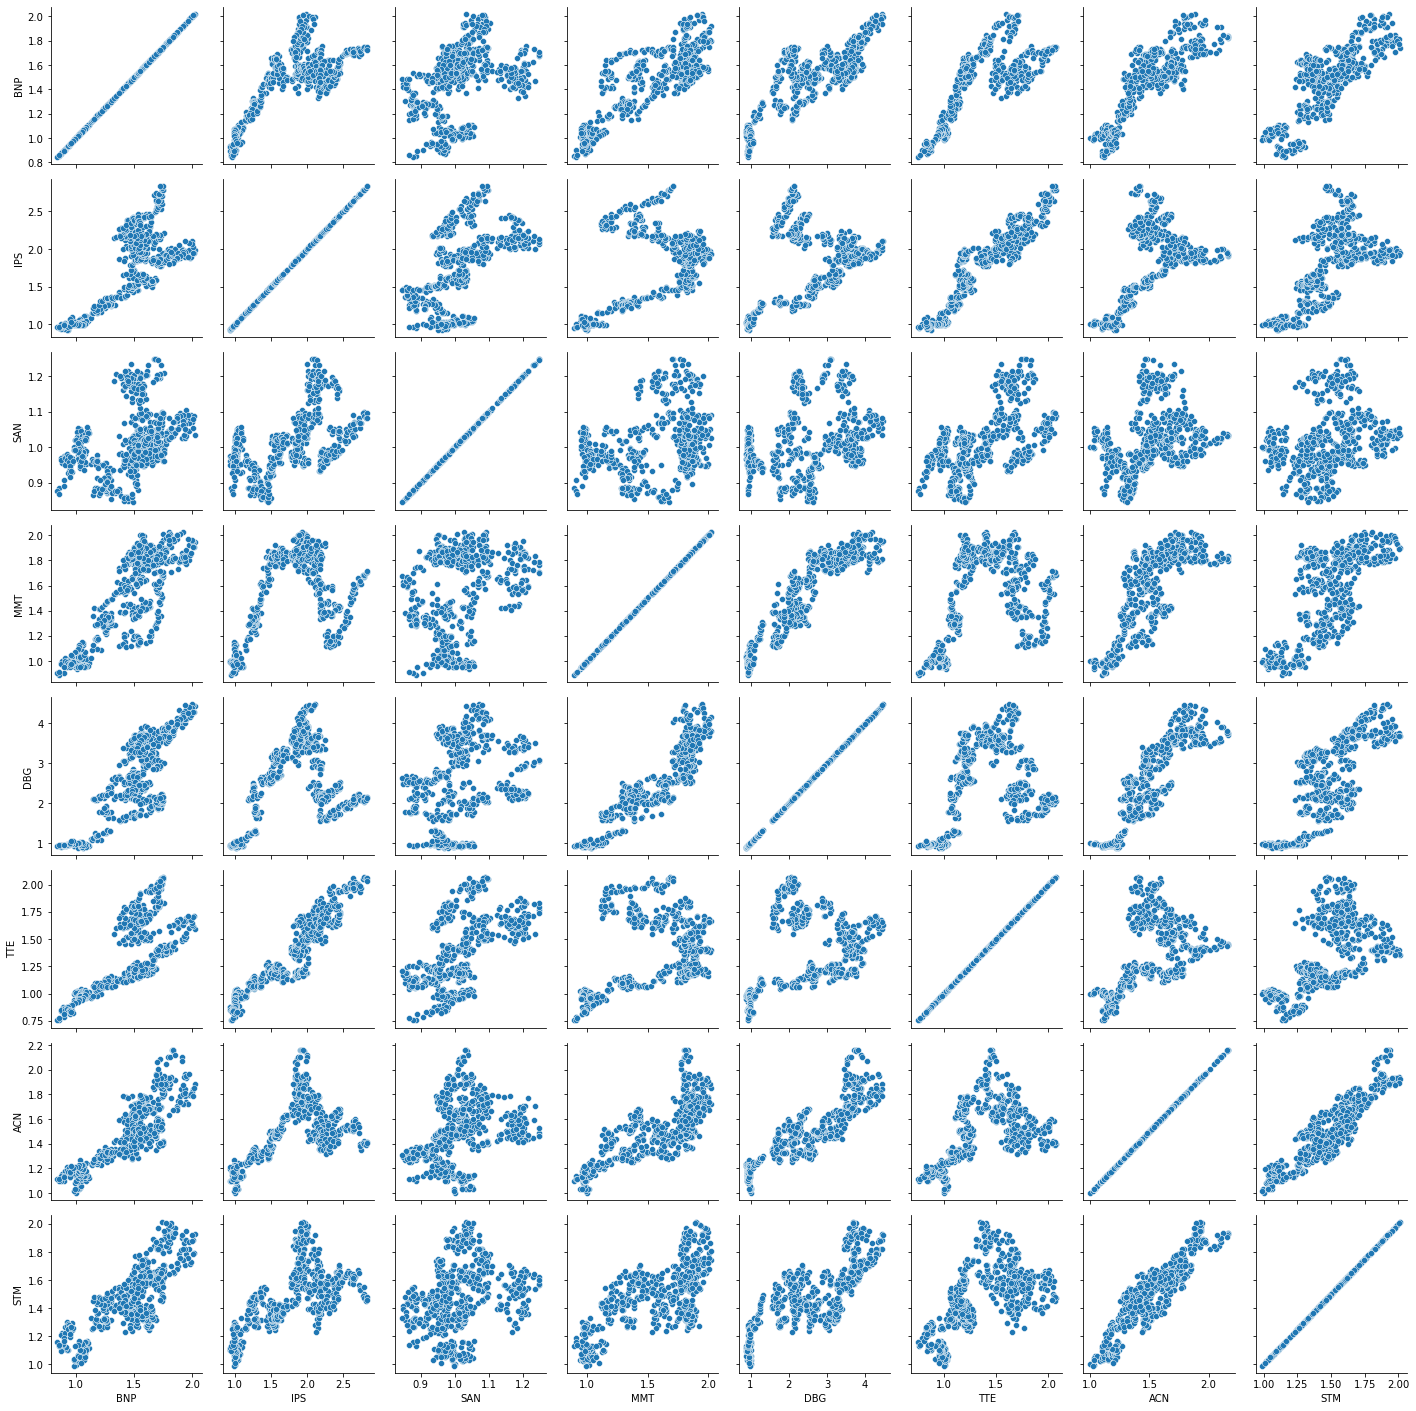

In [72]:
plt.figure(figsize=(8,8))
g = sns.PairGrid(df_corr)
g.map(sns.scatterplot)

### EDA part 2

In [73]:
# Duration for portfolio optimization 
start = start_corr
end = end_corr
[start,end]

[Timestamp('2020-06-11 00:00:00'), Timestamp('2022-12-30 00:00:00')]

In [74]:
bnp = bnp[start:end]

ips = ips[start:end]

san = san[start:end]

mmt = mmt[start:end]

dbg = dbg[start:end]

tte = tte[start:end]

acn = acn[start:end]
stm = stm[start:end]

acn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-11,205.520004,205.949997,195.880005,195.949997,189.513336,4046600
2020-06-12,201.100006,202.429993,197.309998,201.589996,194.968079,2590100
2020-06-15,196.490005,200.740005,194.830002,199.789993,193.227203,2310800
2020-06-16,203.360001,206.880005,202.119995,204.399994,197.685745,2154000
2020-06-17,206.029999,206.330002,203.649994,205.199997,198.459457,1594800
...,...,...,...,...,...,...
2022-12-23,265.790009,266.709991,263.309998,266.089996,266.089996,1213300
2022-12-27,265.920013,267.220001,263.700012,265.309998,265.309998,1009600
2022-12-28,266.100006,269.140015,262.670013,263.119995,263.119995,1387000


In this EDA part, it's really important that all the stocks have the same time basis. Stocks datetime are based on the working days of the country in which the stock is being exchanged. So it is influenced by the public holidays for instance, meaning that there could be datetimes in which USA stocks have missing values where as French stocks don't.
To sort this out, I define this rule: if a value at a date is not present in the usa stock, we take the value at its previous date

In [75]:
# Get the index dates for different stock exchange
usa_stock_dates = list(acn.index) 
fr_stock_dates = list(bnp.index) # any value of a french stock exchange will work here
stock_columns = acn.columns

# reshape usa stocks to have the same size of date index
if len(usa_stock_dates) < len(fr_stock_dates) :
    missing_dates = [x for x in fr_stock_dates if x not in usa_stock_dates]
    acn_fr=pd.DataFrame(0,fr_stock_dates,stock_columns) #initialize the new data
    date_prev = usa_stock_dates[0]
    for date in fr_stock_dates:
        for col in stock_columns:
            if date in usa_stock_dates:
                    acn_fr.loc[date,col]  = acn.loc[date,col]
                    date_prev = date
            else:
                    acn_fr.loc[date,col] = acn.loc[date_prev,col]

In [76]:
# get usd to euro parity 
usd2eur = yf.download('USDEUR=X')
usd2eur = usd2eur[start:end]

# convert usd to euro
change_columns_list = ['Open','High','Low','Close','Adj Close']
for col in change_columns_list: 
    acn_fr[col] = usd2eur[col]*acn_fr[col]

acn_fr

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-06-11,180.777451,181.837377,171.822019,172.408561,166.745201,4046600
2020-06-12,178.132372,180.182937,173.997822,178.586563,172.720273,2590100
2020-06-15,174.593159,178.773024,172.537554,177.559359,171.726810,2310800
2020-06-16,179.361490,184.193537,178.081868,180.282835,174.360801,2154000
2020-06-17,182.894885,184.054618,180.270979,182.145780,176.162540,1594800
...,...,...,...,...,...,...
2022-12-23,250.666551,251.899583,247.677288,250.949469,250.949469,1213300
2022-12-27,249.919608,251.798737,247.164708,249.346296,249.346296,1009600
2022-12-28,250.160620,253.572959,246.077145,247.359111,247.359111,1387000
2022-12-29,249.867072,255.240802,248.908288,252.491912,252.491912,1516800


### Pretreatment for Optimization

In [77]:
# Determine the cumulative normalized return for each stock
for stock_df in (bnp, ips, san, mmt, dbg, tte, acn_fr, stm) :
    stock_df['Norm return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [78]:
acn_fr

,Open,High,Low,Close,Adj Close,Volume,Norm return
2020-06-11,180.777451,181.837377,171.822019,172.408561,166.745201,4046600,1.000000
2020-06-12,178.132372,180.182937,173.997822,178.586563,172.720273,2590100,1.035834
2020-06-15,174.593159,178.773024,172.537554,177.559359,171.726810,2310800,1.029876
2020-06-16,179.361490,184.193537,178.081868,180.282835,174.360801,2154000,1.045672
2020-06-17,182.894885,184.054618,180.270979,182.145780,176.162540,1594800,1.056477
...,...,...,...,...,...,...,...
2022-12-23,250.666551,251.899583,247.677288,250.949469,250.949469,1213300,1.504988
2022-12-27,249.919608,251.798737,247.164708,249.346296,249.346296,1009600,1.495373
2022-12-28,250.160620,253.572959,246.077145,247.359111,247.359111,1387000,1.483456
2022-12-29,249.867072,255.240802,248.908288,252.491912,252.491912,1516800,1.514238


Now I test my allocation computation by considering a portfolio with equally distributed weights among stocks at my start time

In [79]:
weights_actu  = 12.5*np.ones(8)
weights_actu = [wt/100 for wt in weights_actu]
 
for stock_df,allo in zip([bnp, ips, san, mmt, dbg, tte, acn_fr, stm],weights_actu):
    stock_df['Allocation'] = stock_df['Norm return']* allo
    
sum(weights_actu)

1.0

In [80]:
acn_fr

,Open,High,Low,Close,Adj Close,Volume,Norm return,Allocation
2020-06-11,180.777451,181.837377,171.822019,172.408561,166.745201,4046600,1.000000,0.125000
2020-06-12,178.132372,180.182937,173.997822,178.586563,172.720273,2590100,1.035834,0.129479
2020-06-15,174.593159,178.773024,172.537554,177.559359,171.726810,2310800,1.029876,0.128734
2020-06-16,179.361490,184.193537,178.081868,180.282835,174.360801,2154000,1.045672,0.130709
2020-06-17,182.894885,184.054618,180.270979,182.145780,176.162540,1594800,1.056477,0.132060
...,...,...,...,...,...,...,...,...
2022-12-23,250.666551,251.899583,247.677288,250.949469,250.949469,1213300,1.504988,0.188123
2022-12-27,249.919608,251.798737,247.164708,249.346296,249.346296,1009600,1.495373,0.186922
2022-12-28,250.160620,253.572959,246.077145,247.359111,247.359111,1387000,1.483456,0.185432
2022-12-29,249.867072,255.240802,248.908288,252.491912,252.491912,1516800,1.514238,0.189280


In [81]:
# Check of the evolution of the money's portfolio 
initial_money = 10000 # in euros
for stock_df in (bnp,ips, san, mmt, dbg, tte, acn_fr, stm):
    stock_df['Position values'] = stock_df['Allocation']*initial_money

In [82]:
# Create a portfolio with the invested money
all_pos_vals =[bnp['Position values'], 
               ips['Position values'], 
               san['Position values'],
               mmt['Position values'],
               dbg['Position values'],
               tte['Position values'],
               acn_fr['Position values'],stm['Position values']]

# axis = 1 to modify the columns, axis = 0 to modify the rows
portfolio = pd.concat(all_pos_vals,axis=1) 
columns =['BNP Pos val','IPS Pos val','SAN Pos val',
          'MMT Pos val','DBG Pos val',
          'TTE Pos val','ACN Pos val','STM Pos val']
portfolio.columns = columns
portfolio['Total pos'] = portfolio.sum(axis=1)
portfolio

,BNP Pos val,IPS Pos val,SAN Pos val,MMT Pos val,DBG Pos val,TTE Pos val,ACN Pos val,STM Pos val,Total pos
2020-06-11,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,10000.000000
2020-06-12,1257.913738,1247.184523,1247.197860,1262.135807,1233.095377,1263.318928,1294.791931,1244.565384,10050.203548
2020-06-15,1233.632903,1238.738668,1249.579748,1235.436898,1230.277997,1248.739980,1287.344474,1239.674040,9963.424707
2020-06-16,1295.323628,1255.630493,1275.919103,1237.864060,1255.634874,1289.776793,1307.090098,1292.934923,10210.173972
2020-06-17,1293.345271,1283.783650,1312.906336,1240.291354,1241.547746,1293.916506,1320.596777,1304.347849,10290.735488
...,...,...,...,...,...,...,...,...,...
2022-12-23,2178.780054,3472.371747,1369.255935,2106.701914,2576.362085,2567.775915,1881.234570,1859.312187,18011.794406
2022-12-27,2186.879639,3484.470418,1360.677397,2105.306715,2581.195896,2585.990253,1869.216438,1839.393915,18013.130671
2022-12-28,2169.060676,3520.767124,1353.603843,2120.653502,2602.947583,2574.714671,1854.319568,1815.326179,18011.393145
2022-12-29,2183.234834,3538.915362,1369.255935,2136.000422,2682.703615,2575.148436,1892.797440,1854.055918,18232.111962


Text(0, 0.5, 'Total position')

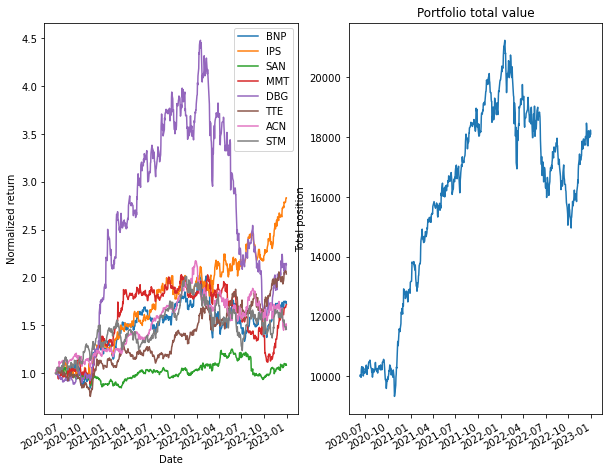

In [83]:
# Visualize the normalized return and the portfolio's total value
fig,axes = plt.subplots(1,2)

bnp['Norm return'].plot(figsize=(10,8), label='BNP', ax = axes[0])

ips['Norm return'].plot(figsize=(10,8), label='IPS', ax = axes[0])

san['Norm return'].plot(figsize=(10,8), label='SAN', ax = axes[0])

mmt['Norm return'].plot(figsize=(10,8), label='MMT', ax = axes[0])

dbg['Norm return'].plot(figsize=(10,8), label='DBG', ax = axes[0])

tte['Norm return'].plot(figsize=(10,8), label='TTE', ax = axes[0])

acn_fr['Norm return'].plot(figsize=(10,8), label='ACN', ax = axes[0])

stm['Norm return'].plot(figsize=(10,8), label='STM', ax = axes[0])

axes[0].set(ylabel = 'Normalized return')
axes[0].legend()


portfolio['Total pos'].plot(figsize=(10,8), ax =axes[1])
axes[1].set(title = 'Portfolio total value')
plt.ylabel('Total position')

It means that if someone invested 10k and chose an equally- distributed weights portfolio at the 09/06/2020, it would earn 16.8 k now. 

Suppose now that 

Let's check for statistical conditions to apply the optimization techniques 

In [84]:
# Daily return
portfolio['Daily Return']=portfolio['Total pos'].pct_change(1)
portfolio['Daily Return']

2020-06-11         NaN
2020-06-12    0.005020
2020-06-15   -0.008635
2020-06-16    0.024766
2020-06-17    0.007890
                ...   
2022-12-23    0.002187
2022-12-27    0.000074
2022-12-28   -0.000096
2022-12-29    0.012254
2022-12-30   -0.007096
Name: Daily Return, Length: 660, dtype: float64

In [85]:
# Mean of the daily return
portfolio['Daily Return'].mean()

0.0009899525225607077

In [86]:
# Standard deviation of the daily return
portfolio['Daily Return'].std()

0.013357225946309498

<AxesSubplot:ylabel='Density'>

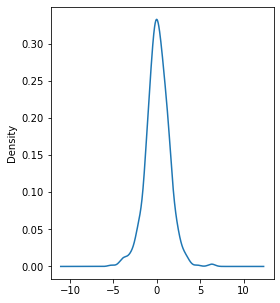

In [87]:
#It's necessary for the distribution of the daily return to be normal before optimization
(100*portfolio['Daily Return']).plot(kind='kde',figsize=(4,5))

### Applications of the modern portfolio theory (MPT)

The modern portfolio theory is a concept that suggests that when creating a portfolio of assets, the expected return is maximized for a given level of risk. It calls for a mean-variance analysis where the mean of the return values is the representation of the overall expected return and the associated risk is given by the standard deviation of the return values.

In other words, the problem consists of maximizing the ratio : expected return / risk which is called the Sharpe ratio.
This MPT sits on the concept of diversification in which holiding combinations of instruments that are not perfectly positively correlated reduce the exposure to risk and therefore improves the Sharpe ratio. 

For more documentation, visit those websites :

https://corporatefinanceinstitute.com/resources/wealth-management/modern-portfolio-theory-mpt/
https://en.wikipedia.org/wiki/Modern_portfolio_theory#:~:text=Modern%20portfolio%20theory%20(MPT)%2C,a%20given%20level%20of%20risk.
https://www.investopedia.com/articles/07/sharpe_ratio.asp

In [88]:
# Cumulative return
cumulative_return = 100*(portfolio['Total pos'][end]/(portfolio['Total pos'][0]-1))
cumulative_return

181.0454174681688

In [89]:
# Daily Sharpe ratio
ratio_sharp_daily = portfolio['Daily Return'].mean()/portfolio['Daily Return'].std()
ratio_sharp_daily

0.07411363156840393

In [90]:
# Annnual Sharpe ratio
ratio_sharp_yearly = (252**0.5)*ratio_sharp_daily
ratio_sharp_yearly

1.1765174273391765

In [91]:
## Determine statistical elements for each stock value
# Daily return
for stock_df in (bnp, ips,san, mmt,dbg, tte,acn_fr, stm):
    stock_df['Daily Return'] = stock_df['Adj Close'].pct_change(1)
    
acn_fr

,Open,High,Low,Close,Adj Close,Volume,Norm return,Allocation,Position values,Daily Return
2020-06-11,180.777451,181.837377,171.822019,172.408561,166.745201,4046600,1.000000,0.125000,1250.000000,NaN
2020-06-12,178.132372,180.182937,173.997822,178.586563,172.720273,2590100,1.035834,0.129479,1294.791931,0.035834
2020-06-15,174.593159,178.773024,172.537554,177.559359,171.726810,2310800,1.029876,0.128734,1287.344474,-0.005752
2020-06-16,179.361490,184.193537,178.081868,180.282835,174.360801,2154000,1.045672,0.130709,1307.090098,0.015338
2020-06-17,182.894885,184.054618,180.270979,182.145780,176.162540,1594800,1.056477,0.132060,1320.596777,0.010333
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,250.666551,251.899583,247.677288,250.949469,250.949469,1213300,1.504988,0.188123,1881.234570,0.005663
2022-12-27,249.919608,251.798737,247.164708,249.346296,249.346296,1009600,1.495373,0.186922,1869.216438,-0.006388
2022-12-28,250.160620,253.572959,246.077145,247.359111,247.359111,1387000,1.483456,0.185432,1854.319568,-0.007970
2022-12-29,249.867072,255.240802,248.908288,252.491912,252.491912,1516800,1.514238,0.189280,1892.797440,0.020750


In [92]:
# Compute expected return - risk or volatility - Sharpe ratio
list_return = []
list_volatility = []
list_ratio_sharpe = []

log_ret = 0
ret_stock = 0
vol_stock = 0
asr_stock = 0

for stock_df in (bnp,ips, san, mmt, dbg, tte,acn_fr, stm):
    log_ret = np.log(stock_df['Adj Close']/stock_df['Adj Close'].shift(1))
    ret_stock=np.sum(log_ret.mean())*252 # mean annual return
    vol_stock=np.sqrt(log_ret.std()*252) # annual volatility
    asr_stock= ret_stock / vol_stock # Sharpe ratio
    
    list_return.append(ret_stock)
    list_volatility.append(vol_stock)
    list_ratio_sharpe.append(asr_stock)

In [93]:
# Creating a dataframe containing all the adjusted price at closing

stocks =pd.concat([bnp['Adj Close'],
                   ips['Adj Close'],
                   san['Adj Close'],
                   mmt['Adj Close'],
                   dbg['Adj Close'],
                   tte['Adj Close'],
                   acn_fr['Adj Close'],stm['Adj Close']],axis=1)
columns = ['BNP',
           'IPS',
           'SAN',
           'MMT',
           'DBG',
           'TTE',
           'ACN','STM']
stocks.columns = columns
stocks

,BNP,IPS,SAN,MMT,DBG,TTE,ACN,STM
2020-06-11,30.865896,20.663111,83.056061,8.959502,2.586011,28.823582,166.745201,22.592360
2020-06-12,31.061308,20.616570,82.869873,9.046487,2.551038,29.130701,172.720273,22.494135
2020-06-15,30.461748,20.476955,83.028137,8.855120,2.545210,28.794527,171.726810,22.405729
2020-06-16,31.985060,20.756186,84.778252,8.872517,2.597668,29.740789,174.360801,23.368361
2020-06-17,31.936209,21.221571,87.235863,8.889915,2.568525,29.836246,176.162540,23.574636
...,...,...,...,...,...,...,...,...
2022-12-23,53.799999,57.400002,90.980003,15.100000,5.330000,59.209999,250.949469,33.605000
2022-12-27,54.000000,57.599998,90.410004,15.090000,5.340000,59.630001,249.346296,33.244999
2022-12-28,53.560001,58.200001,89.940002,15.200000,5.385000,59.369999,247.359111,32.810001
2022-12-29,53.910000,58.500000,90.980003,15.310000,5.550000,59.380001,252.491912,33.509998


In [94]:
# Use the logarithmic format to avoid disparities between return values 
log_ret = np.log(stocks/stocks.shift(1))

In [95]:
# Compute expected return - risk or volatility - Sharpe ratio with the actual weights
weights_actu = np.array(weights_actu)
ret_actu=np.sum(log_ret.mean()*weights_actu)*252 # mean annual return
vol_actu=np.sqrt(np.dot(weights_actu.T,np.dot(log_ret.cov()*252,weights_actu))) # annual volatility
asr_actu = ret_actu / vol_actu # Sharpe Ratio
asr_actu

1.0685510513395218

### Portofolio Optimization with Monte Carlo method
This method consists of allocating randomly weights and evaluating the Sharpe ratio. The process is repeated several times and the optimal allocation is the one giving the highest Sharpe ratio. This approach is ideal when there are few assets to allocate, mainly because it is time-consuming 

In [96]:
np.random.seed(101) 

num_ports = 50000 ; # repeating times

# Initialisation
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports) :
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights) # Creation of random weights

    # Saving the weights
    all_weights[ind,:] = weights
    
    # Expected return (252 for the number of trading days in a year)
    ret_arr[ind]= np.sum(log_ret.mean()*weights*252)

    # Expected volatility (Use of linear algebra)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

print('Done with the Monte Carlo shots. Finding the best allocation ...')

ind_opti = sharpe_arr.argmax()
sharpe_opti = sharpe_arr[ind_opti]
print('Highest Sharpe ratio :', sharpe_opti)
      
# Expected return with optimal allocation
ret_opti = ret_arr[ind_opti]
print('Expected return :', 100* ret_opti, ' %')
# Volatility with optimal allocation
vol_opti = vol_arr[ind_opti]
print('Expected volatility :', 100*vol_opti, ' %')
# Optimal allocation
weights_opti_mc = all_weights[ind_opti,:]
stck_names = columns
for ind in range(len(stck_names)):
    print('optimal allocation for ',stck_names[ind],':',100*weights_opti_mc[ind],'%' )

Done with the Monte Carlo shots. Finding the best allocation ...
Highest Sharpe ratio : 1.3896506033921887
Expected return : 28.514016889015426  %
Expected volatility : 20.51883892210866  %
optimal allocation for  BNP : 0.9380406438177746 %
optimal allocation for  IPS : 34.8024093862455 %
optimal allocation for  SAN : 1.2300921852515856 %
optimal allocation for  MMT : 8.088290512531783 %
optimal allocation for  DBG : 4.385393022424354 %
optimal allocation for  TTE : 31.322751738398285 %
optimal allocation for  ACN : 19.09819341043798 %
optimal allocation for  STM : 0.13482910089273964 %


Let's assess the ASR (Annual Sharpe Ratio) of the companies composing the optimal portfolio

In [97]:
# Create a class company to populate with the needed data
class company:
    stocks=''
    asr=0
    def __init__(self, stocks, asr):
        self.stocks = stocks
        self.asr = asr

In [98]:
# Create a palette of colors for the plot

colorset=[]
for ind in range(len(stck_names)):
   colorset.append(np.random.rand(4))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Annual Sharpe Ratio  (ASR)  of companies in the portfolio
-------------------------------------------------------------

 NB: the greater the ASR, the better the ratio risk/return

 SAN : 0.02

 STM : 0.06

 ACN : 0.07

 BNP : 0.09

 MMT : 0.09

 DBG : 0.11

 TTE : 0.12

 IPS : 0.18


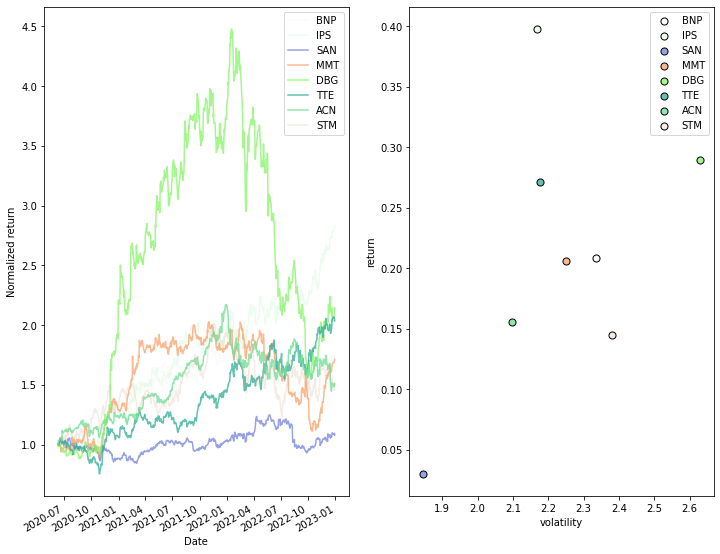

In [99]:
fig,axes = plt.subplots(nrows=1,ncols=2)

plt.figure(1)
plt.subplot(1,2,1)
bnp['Norm return'].plot(figsize=(12,10), c= colorset[0],label='BNP')
ips['Norm return'].plot(figsize=(12,10), c= colorset[1], label='IPS')
san['Norm return'].plot(figsize=(12,10),  c= colorset[2], label='SAN')
mmt['Norm return'].plot(figsize=(12,10),  c= colorset[3], label='MMT')
dbg['Norm return'].plot(figsize=(12,10),   c= colorset[4],label='DBG')
tte['Norm return'].plot(figsize=(12,10),   c= colorset[5],label='TTE')
acn_fr['Norm return'].plot(figsize=(12,10),   c= colorset[6],label='ACN')
stm['Norm return'].plot(figsize=(12,10), c= colorset[7], label='STM')
plt.ylabel('Normalized return')
plt.legend()

plt.subplot(1,2,2)
num_stocks = len(columns)

for ind in range(num_stocks) :
     plt.scatter(list_volatility[ind],list_return[ind],s=50, c= colorset[ind], edgecolors ='black',label = columns[ind])

plt.xlabel('volatility')
plt.ylabel('return')
plt.legend()


companies_list=[]
for ind in range(len(stck_names)):
      companies_list.append(company(stck_names[ind],list_ratio_sharpe[ind]))

companies_list.sort(key=lambda s:s.asr)

print('Annual Sharpe Ratio ','(ASR)',' of companies in the portfolio')
print('-------------------------------------------------------------')
print('\n NB: the greater the ASR, the better the ratio risk/return')

for cmp in companies_list:
     print('\n',cmp.stocks,':',round(cmp.asr,2))

As we can see, IPS and TTE have the highest ASR. That's why the optimization allocated more weight to them 

It should be keep in mind that the randow weights given by the Monte Carlo method represent respectively an investment portfolio. Thus, it is possible to visualize their performance on a return - volatility - ASR basis. From there, it's easier how good the optimal portfolio will perform with respect to the other portfolios

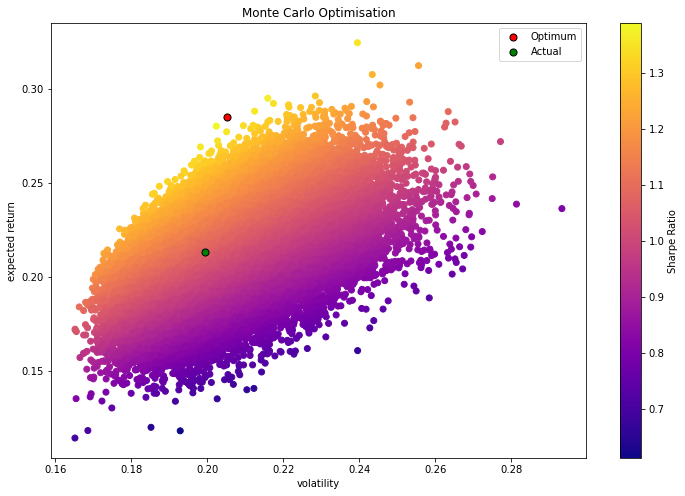

In [100]:
# Visualization of the combinations given by Monte Carlo
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('expected return')

plt.scatter(vol_opti,ret_opti,c='red',s=50, edgecolors ='black', label = 'Optimum')
plt.scatter(vol_actu,ret_actu,c='green',s=50, edgecolors ='black', label = 'Actual')

plt.title('Monte Carlo Optimisation')
plt.legend()

Recall that the actual portfolio has equal weights for each stock. We can see that the optimal portfolio takes higher risk to catch a more important return. Also, there exists point with expected return greater than that of the optimal portfolio. However, the subsequent risk is greater but not interesting from an ASR viewpoint. 
Let's evaluate the total gross money of our optimal portfolio 

In [101]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,Norm return,Allocation,Position values,Daily Return
Date,,,,,,,,,,
2020-06-11,23.270000,23.440001,22.879999,23.000000,22.592360,3669814,1.000000,0.125000,1250.000000,NaN
2020-06-12,22.680000,23.400000,22.530001,22.900000,22.494135,2626569,0.995652,0.124457,1244.565384,-0.004348
2020-06-15,22.190001,22.930000,21.860001,22.809999,22.405729,2619229,0.991739,0.123967,1239.674040,-0.003930
2020-06-16,23.549999,24.180000,23.340000,23.790001,23.368361,3022147,1.034348,0.129293,1292.934923,0.042964
2020-06-17,23.809999,24.320000,23.549999,24.000000,23.574636,3384276,1.043478,0.130435,1304.347849,0.008827
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,33.889999,34.029999,33.314999,33.605000,33.605000,1164932,1.487450,0.185931,1859.312187,-0.008702
2022-12-27,33.810001,34.020000,33.035000,33.244999,33.244999,832140,1.471515,0.183939,1839.393915,-0.010713
2022-12-28,33.299999,33.365002,32.764999,32.810001,32.810001,1287208,1.452261,0.181533,1815.326179,-0.013085


In [102]:
# Total gross money - Monte Carlo
for stock_df,allo in zip([bnp, ips,  san, mmt, dbg, tte,acn_fr, stm],weights_opti_mc):
    stock_df['Opti allocation mc'] = stock_df['Norm return']* allo
    
for stock_df in (bnp, ips, san, mmt,  dbg, tte, acn_fr,stm):
    stock_df['Position values opti mc'] = stock_df['Opti allocation mc']*initial_money

all_pos_vals_opti_mc =[bnp['Position values opti mc'],
                       ips['Position values opti mc'],
                       san['Position values opti mc'],
                       mmt['Position values opti mc'], 
                       dbg['Position values opti mc'],
                       tte['Position values opti mc'],
                       acn_fr['Position values opti mc'],stm['Position values opti mc']]

portfolio_opti_mc = pd.concat(all_pos_vals_opti_mc,axis=1) 
columns =['BNP Pos val','IPS Pos val','SAN Pos val','MMT Pos val','DBG Pos val','TTE Pos val','ACN Pos val','STM Pos val']
portfolio_opti_mc.columns = columns
portfolio_opti_mc['Total pos'] = portfolio_opti_mc.sum(axis=1)

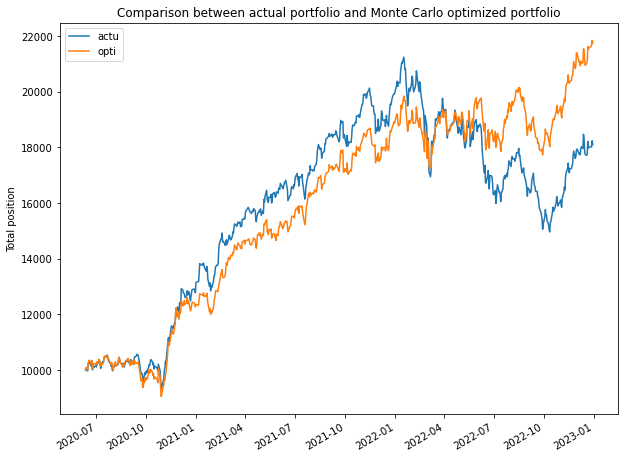

In [103]:
# Portfolio Benchmmark
portfolio['Total pos'].plot(figsize=(10,8), label='actu')
portfolio_opti_mc['Total pos'].plot(figsize=(10,8), label='opti')
plt.title('Comparison between actual portfolio and Monte Carlo optimized portfolio')
plt.ylabel('Total position')
plt.legend()

### Portofolio Optimization with Least Squares Error Method
It is a standard approach that consists of minimizing the sum of the squares of the residuals. the residual is defined as the the difference between the observed value and the fitted value. In our case, the 

It is a more stable and efficient because it provides a quicker convergence and thus it's ideal when the portfolio has a lot of assets to allocate

To perform this algorithm, some steps need to be achieved :

**- Define the function F to minimize :** In our case, since we want to maximize the Sharpe ratio, the function to minimize will be the negative value of the ASR

**- Initialize the variable linked to F :** In our case, we initialize the weights of the stocks

**- Define any related constraint :** In our case, a general constraint is to always check that the sum of our weights should be 100% or 1 depending if we are in percent-based or unit-based. 

**- Define the variables' boundaries (if they exist):** To simplify the problem, we will just check that all the weights have the same boundaries. It should be noted that the possibility to set the boundaries gives an important leverage since in real life, the stock market status can disadvantage one or several sectors , thus we can adjust the limit of the weights of companies impacted knowing this

In [104]:
# we define a function that returns the necessary metrics when we input a set of weights
def get_ret_vol_arr(weights):
    weights = np.array(weights)
    ret=np.sum(log_ret.mean()*weights)*252
    vol=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    asr = ret / vol
    
    return np.array([ret, vol, asr])

In [105]:
# Function to minimize 
def neg_sharpe(weights):
    return get_ret_vol_arr(weights)[2]*(-1)

In [106]:
# Initialization of the problem with a portfolio of equally-distributed weights 
equal_weights = np.ones(len(stck_names))/len(stck_names) # create an even-weighted portfolio
init_guess = equal_weights

In [107]:
# Constraints
def check_sum(weights) :
    # return 0 if the sum of weights is equal to 1
    return np.sum(weights)-1

In [108]:
# The declaration of the constraints is made using tuple
cons =({'type': 'eq','fun': check_sum})

In [109]:
# The declaration of the boundaries is made using tuples, each tuple representing the min and max of each stock's weight
# In our case, we want our optimization to give at least a weight (> 1%) to a stock and a stock doesn't not represent 
# more than 50% of the portfolio
bound = (0.01,0.5)
bounds = ((bound, ) * len(stock_list_names))

In [110]:
# We can now launch our algorithm thanks to the minimize function from the scipy module.

from scipy.optimize import minimize

# SLSQP stands for Sequential least Squares Programming optimizer
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds = bounds, constraints = cons)

opt_results #check the results

     fun: -1.4388377962034649
     jac: array([ 0.55310081, -0.073131  ,  0.18199076,  0.05308619,  0.05268843,
        0.05331525,  0.05272253,  0.42498514])
 message: 'Optimization terminated successfully'
    nfev: 73
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.01      , 0.5       , 0.01      , 0.09430855, 0.01983505,
       0.25565204, 0.10020435, 0.01      ])

The optimisation is successful. As we can see, the 'fun' field gives the optimal value of the Sharpe Ratio related the function to optimize (thus in a negated form) and the 'x' field give the value that optimizs f. We iterate just 8 times to converge to the solution which would have been impossible with the Monte Carlo algorithm 

In [111]:
# Check the optimized weights
for ind in range(len(stck_names)):
    print('optimal allocation for ',stck_names[ind],':',100*opt_results.x[ind],'%' )
    
sum(opt_results.x)

optimal allocation for  BNP : 1.0 %
optimal allocation for  IPS : 50.0 %
optimal allocation for  SAN : 1.0 %
optimal allocation for  MMT : 9.430855209135727 %
optimal allocation for  DBG : 1.9835054320510674 %
optimal allocation for  TTE : 25.5652040065033 %
optimal allocation for  ACN : 10.02043535230991 %
optimal allocation for  STM : 1.000000000000001 %


1.0000000000000002

In [112]:
# Evaluate the metrics for initial and final value
print('Metrics (in this order : return - risk - ASR)')
print('initial guess:', get_ret_vol_arr(init_guess)) 
print('final guess:', get_ret_vol_arr(opt_results.x))

Metrics (in this order : return - risk - ASR)
initial guess: [0.21302105 0.19935505 1.06855105]
final guess: [0.3129912  0.21753056 1.4388378 ]


In [113]:
# Total gross money - LSE minimization
weights_opti_mm = opt_results.x
for stock_df,allo in zip([bnp, ips,  san, mmt, dbg, tte,acn_fr, stm],weights_opti_mm):
    stock_df['Opti allocation mm'] = stock_df['Norm return']* allo
    
for stock_df in (bnp, ips, san, mmt,  dbg, tte, acn_fr,stm):
    stock_df['Position values opti mm'] = stock_df['Opti allocation mm']*initial_money

all_pos_vals_opti_mm =[bnp['Position values opti mm'],
                       ips['Position values opti mm'],
                       san['Position values opti mm'],
                       mmt['Position values opti mm'], 
                       dbg['Position values opti mm'],
                       tte['Position values opti mm'],
                       acn_fr['Position values opti mm'],stm['Position values opti mm']]

portfolio_opti_mm = pd.concat(all_pos_vals_opti_mm,axis=1) 
columns =['BNP Pos val','IPS Pos val','SAN Pos val','MMT Pos val','DBG Pos val','TTE Pos val','ACN Pos val','STM Pos val']
portfolio_opti_mm.columns = columns
portfolio_opti_mm['Total pos'] = portfolio_opti_mm.sum(axis=1)

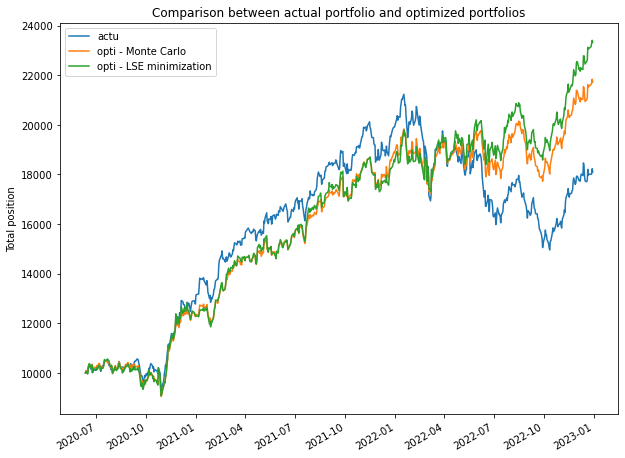

In [114]:
# Portfolio Benchmmark updated
portfolio['Total pos'].plot(figsize=(10,8), label='actu')
portfolio_opti_mc['Total pos'].plot(figsize=(10,8), label='opti - Monte Carlo')
portfolio_opti_mm['Total pos'].plot(figsize=(10,8), label='opti - LSE minimization')
plt.title('Comparison between actual portfolio and optimized portfolios')
plt.ylabel('Total position')
plt.legend()

The LSE approach allows to perform much better on the long term . In general, note that the optimized portfolios perform far better than the actual portfolio

### Efficient frontier
The approach used so far was based on maximizing the ASR, thus indirectly maximizing the return and minimizing the risk at the same time. A cornerstone of the MPT is to see on a step above by looking at the ability to maximize the return for a given risk. In fact, Not all the investors have the same level of risk. Hence, an investor can seek a portfolio with securities offering high returns but with a combination of stock's risk that is lower than the risk of individual stocks. It's important that the stocks' risks are less synchronized (lowe covariance) in order to lower the general risk.

An efficient frontier does this job by providing a graphical representation of those specific portfolios (the risk tolerance and return are given respectively on the x and yaxis). 

Its implementation is quite similar to the LSE optimization problem defined earlier. The only difference resides in the following points :

**- if the frontier is efficient on the volatility, then the function to minimize becomes the volatility. Otherwise, the function to minimize is the negative value of the return (in order to maximize the return)**

**- if the frontier is efficient on the volatility, then we define and parse a range of possible returns. Otherwise, we define and parse and range of possible volatilities** 

**- we always check the metric that is used during parsing is always close to its value found during the optimization algorithm**


In [115]:
## Compute the efficient frontier
frontier_volatility = [] # efficient on a volatility basis

# The range of returns should be taken from the Monte Carlo shots to ease the computation
return_max=max(ret_arr)
return_min=min(ret_arr)
frontier_return = np.linspace(return_min,return_max,100) # 100 defined points 
# beware : the more points you have, greater is the computing time

# Function to minimize
def minimize_volatility(weights):
    return get_ret_vol_arr(weights)[1]

for possible_return in frontier_return: 
    # Constraints
    cons_new =({'type': 'eq','fun': check_sum},
           {'type': 'eq','fun': lambda w: get_ret_vol_arr(w)[0] - possible_return}) 
    
    # LSE optimization   
    opt_results_vol = minimize(minimize_volatility,init_guess,method='SLSQP',
                               bounds = bounds, constraints = cons_new) # the boundaries are the same
    
    # Save the results
    frontier_volatility.append(opt_results_vol['fun'])

print('done')

done


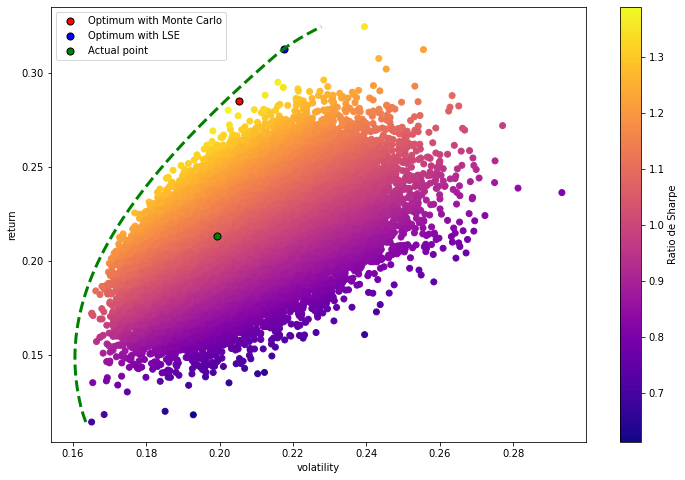

In [116]:
# plot the efficient frontier
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('volatility')
plt.ylabel('return')

vol_opti_mm = get_ret_vol_arr(opt_results.x)[1]
ret_opti_mm = get_ret_vol_arr(opt_results.x)[0]

plt.scatter(vol_opti,ret_opti,c='red',s=50, edgecolors ='black',label = 'Optimum with Monte Carlo')
plt.scatter(vol_opti_mm,ret_opti_mm,c='blue',s=50, edgecolors ='black',label = 'Optimum with LSE')
plt.scatter(vol_actu,ret_actu,c='green',s=50, edgecolors ='black',label = 'Actual point')
plt.plot(frontier_volatility,frontier_return,'g--',linewidth=3)
plt.legend()

Now check with a return efficiency approach

In [117]:
## Compute the efficient frontier
frontier_return = [] # efficient on a return basis

# The range of risks should be taken from the Monte Carlo shots to ease the computation
risk_max=max(vol_arr)
risk_min=min(vol_arr)
frontier_risk = np.linspace(risk_min,risk_max,100) # 100 defined points 
# beware : the more points you have, greater is the computing time

# Function to minimize
def minimize_neg_return(weights):
    return get_ret_vol_arr(weights)[0]*(-1)

for possible_risk in frontier_risk: 
    # Constraints
    cons_new =({'type': 'eq','fun': check_sum},
           {'type': 'eq','fun': lambda w: get_ret_vol_arr(w)[1] - possible_risk}) 
    
    # LSE optimization   
    opt_results_vol = minimize(minimize_neg_return,init_guess,method='SLSQP',
                               bounds = bounds, constraints = cons_new) # the boundaries are the same
    
    # Save the results
    frontier_return.append(opt_results_vol['fun']*(-1))

print('done')

done


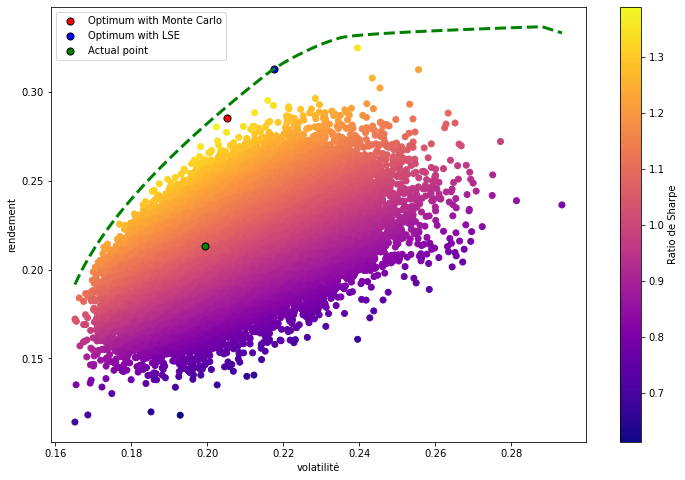

In [118]:
# plot the efficient frontier
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('volatilité')
plt.ylabel('rendement')

vol_opti_mm = get_ret_vol_arr(opt_results.x)[1]
ret_opti_mm = get_ret_vol_arr(opt_results.x)[0]

plt.scatter(vol_opti,ret_opti,c='red',s=50, edgecolors ='black',label = 'Optimum with Monte Carlo')
plt.scatter(vol_opti_mm,ret_opti_mm,c='blue',s=50, edgecolors ='black',label = 'Optimum with LSE')
plt.scatter(vol_actu,ret_actu,c='green',s=50, edgecolors ='black',label = 'Actual point')
plt.plot(frontier_risk,frontier_return,'g--',linewidth=3)
plt.legend()

With the definition of the frontiers, one can check for the expected return with the maximum risk it can wield. We also saw that it's possible to get the best trade off by optimising the ASR. However, note that the expected performance is conditioned by the choice of the assets to put inside the portfolio (which can be overcome somehow by choosing for instance the best stocks of the CAC 40 or S&P500). Besides, another more important issue is the use of past data that doesn't guarantee that the expected performance will be reached in the future.

To cope with this issue, 2 methods can be envisionned using time series analysis :

**- Approach A :** the historical data are splitted in half. The 1st half are used to train the model and optimized the weights and the 2nd half is used to test 

**- Approach B :** we forecast the prices of each stock (using models such as GARCH, SARIMA, Holt Winters, Neural Networks, etc) and use the future prices as test data. all the historical data are only used for the training

It's important in each case that the train and test data have the same duration. 